In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
try:
    import google.colab; IN_COLAB = True
    !pip install umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)
random_state = 99 #ini buat untuk random_state dan ini penting banget buat kmeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=b0ab66a6500d1632ff83abc266221e8d4d30195708aaf133567bdded0b2aa99e
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=be93f767dbe200477008e10b7af3df0863a8a80c80289b63c90f433783000f41
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
--2023-06-13 16:22:11--  https://raw.githubusercontent.com/taudata-indonesia/eLearnin

#Trial 1

In [10]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score as siluet

In [6]:
df = pd.read_excel("/content/2. Dataset TanyaMamaa.xlsx")

In [7]:
df.head()

,Harga Barang,Discount Value
0,345000000,0.40
1,345000000,0.05
2,345000000,0.25
3,327600000,0.05
4,322000000,0.20


In [8]:
df2 = df
print(df2)

       Harga Barang  Discount Value
0         345000000            0.40
1         345000000            0.05
2         345000000            0.25
3         327600000            0.05
4         322000000            0.20
...             ...             ...
10860          4250            0.25
10861          4240            0.30
10862          4000            0.25
10863          3880            0.15
10864          3560            0.10

[10865 rows x 2 columns]


In [9]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Price' column using min-max scaling
df2['Normalized_Price'] = scaler.fit_transform(df2[['Harga Barang']])

# Print the updated DataFrame
print(df2)

       Harga Barang  Discount Value  Normalized_Price
0         345000000            0.40      1.000000e+00
1         345000000            0.05      1.000000e+00
2         345000000            0.25      1.000000e+00
3         327600000            0.05      9.495647e-01
4         322000000            0.20      9.333326e-01
...             ...             ...               ...
10860          4250            0.25      2.000021e-06
10861          4240            0.30      1.971035e-06
10862          4000            0.25      1.275375e-06
10863          3880            0.15      9.275458e-07
10864          3560            0.10      0.000000e+00

[10865 rows x 3 columns]


In [10]:
X = df2[['Normalized_Price','Discount Value']]#.values

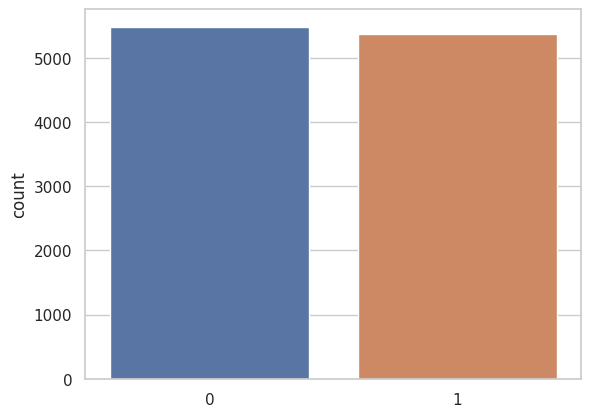

In [11]:
#kmeans
k = 2
km = cluster.KMeans(n_clusters=k, init='random', random_state = 99)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(x=C_km)

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

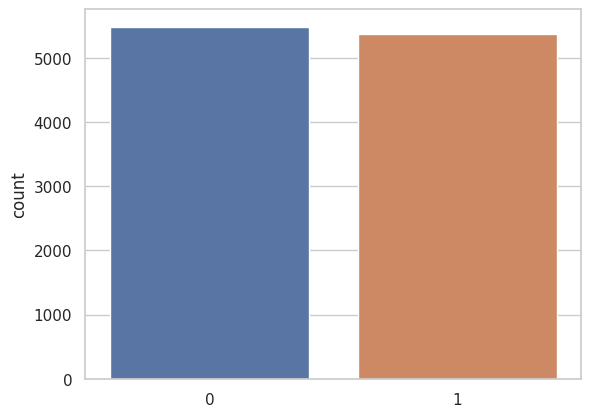

In [12]:
k = 2
kmPP1 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP1.fit(X)
C_kmpp1 = kmPP1.predict(X)

sns.countplot(x=C_kmpp1)
C_kmpp1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

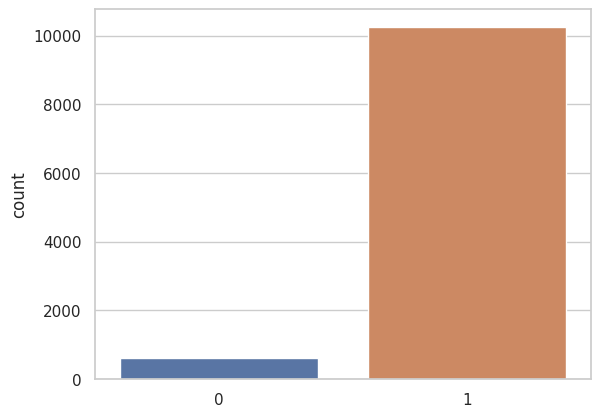

In [13]:
#minibatchkmeans
k = 2
# MiniBatch k-Means http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
mbkm1 = cluster.MiniBatchKMeans(n_clusters=k, init='random', \
                               max_iter=300, tol=0.0001, batch_size = 100, random_state = 99)
mbkm1.fit(X)
C_mbkm1 = mbkm1.predict(X)
sns.countplot(x=C_mbkm1)
C_mbkm1[:10]

In [14]:
Hasil_Clustering = [C_km, C_kmpp1, C_mbkm1]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')

0.5271876432883951, 0.5271876432883951, 0.643538591497192, 

kita akan memilih mbkm 1 krn skor silhouette lbi kecil

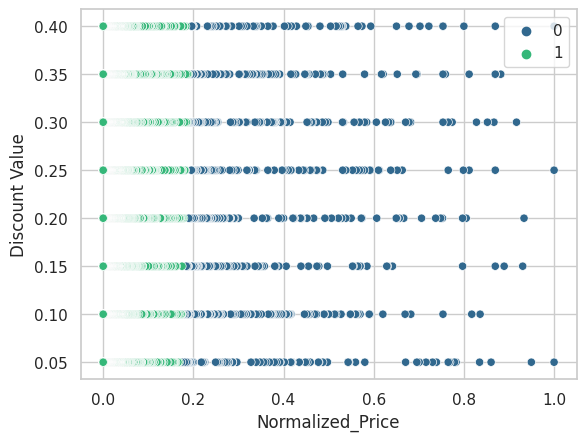

In [15]:
sns.set(style="whitegrid")

# Create a scatter plot for each cluster
sns.scatterplot(data=df2, x='Normalized_Price', y='Discount Value', hue=C_mbkm1, palette='viridis')

# Show the plot
plt.show()

In [16]:
df2['Cluster'] = C_mbkm1
df2.sample()

,Harga Barang,Discount Value,Normalized_Price,Cluster
154,169000000,0.1,0.48985,0


In [17]:
df2.sample(20)

,Harga Barang,Discount Value,Normalized_Price,Cluster
3148,4806000,0.15,0.013920,1
7490,406000,0.20,0.001167,1
3084,5000000,0.15,0.014483,1
10580,27260,0.30,0.000069,1
2251,8988000,0.35,0.026042,1
1369,17440000,0.35,0.050541,1
9730,85000,0.40,0.000236,1
9331,115200,0.15,0.000324,1
1924,11000000,0.30,0.031874,1
7672,357000,0.40,0.001024,1


#Pecahin lagi jadi 2

In [25]:
pip install autils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Using cached pyotp-2.8.0-py3-none-any.whl (12 kB)
  Created wheel for autils: filename=Autils-0.4.0-py3-none-any.whl size=26312 sha256=df25fd2da34b450d17abb2c59a4cb332ec98f8fb77436ace80d414567a77849a
  Stored in directory: /root/.cache/pip/wheels/2c/e2/53/827b2497fd4bdb746373c649c53a2ca444c241357c8df98128
Successfully built autils


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
np.set_printoptions(precision=2)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.keras.backend.set_floatx('float64')

tf.autograph.set_verbosity(0)

In [23]:
X = df2[["Harga Barang", "Discount Value"]]
y = df2[["Cluster"]]
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (10865, 2)
The shape of y is: (10865, 1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (7279, 2) y_train.shape (7279, 1)
X_test.shape (3586, 2) y_test.shape (3586, 1)


In [25]:
model = Sequential([
        tf.keras.Input(shape=(2,)),
        Dense(128, activation = 'relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(2, activation = 'softmax'),
    ], name="Tanyamama_model")
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits = True),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "Tanyamama_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 10,819
Trainable params: 10,819
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(
    X_train, y_train,batch_size=32,
    epochs=20)

Epoch 1/20
228/228 [==============================] - 2s 8ms/step - loss: 0.0179 - accuracy: 0.9960
Epoch 2/20
228/228 [==============================] - 2s 8ms/step - loss: 0.0184 - accuracy: 0.9949
Epoch 3/20
228/228 [==============================] - 2s 7ms/step - loss: 0.0154 - accuracy: 0.9968
Epoch 4/20
228/228 [==============================] - 1s 5ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 5/20
228/228 [==============================] - 1s 6ms/step - loss: 0.0220 - accuracy: 0.9909
Epoch 6/20
228/228 [==============================] - 2s 7ms/step - loss: 0.0178 - accuracy: 0.9935
Epoch 7/20
228/228 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9902
Epoch 8/20
228/228 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9879
Epoch 9/20
228/228 [==============================] - 1s 6ms/step - loss: 0.0204 - accuracy: 0.9922
Epoch 10/20
228/228 [==============================] - 3s 14ms/step - loss: 0.0413 - accuracy: 0.985

In [103]:
model.save('tanya_mama_yes_no.keras')

In [37]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [39]:
!zip -r /content/file.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 88%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 88%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 45%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 61%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/fingerprint.pb (stored 0%)


In [28]:
clustertest = model.predict(X_test)

113/113 [==============================] - 0s 2ms/step


In [7]:
dfbaru = pd.read_excel('/content/dataset2.xlsx')

In [8]:
dfbaru.head()

,Harga Barang,Discount Value
0,345000000.0,0.40
1,345000000.0,0.05
2,345000000.0,0.25
3,327600000.0,0.05
4,322000000.0,0.20


In [11]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Price' column using min-max scaling
dfbaru['Normalized_Price'] = scaler.fit_transform(dfbaru[['Harga Barang']])

# Print the updated DataFrame
print(dfbaru)

      Harga Barang  Discount Value  Normalized_Price
0      345000000.0            0.40          0.849966
1      345000000.0            0.05          0.849966
2      345000000.0            0.25          0.849966
3      327600000.0            0.05          0.799520
4      322000000.0            0.20          0.783285
...            ...             ...               ...
3040    54648000.0            0.25          0.008179
3041    55440000.0            0.25          0.010475
3042    52478400.0            0.40          0.001888
3043    51827040.0            0.15          0.000000
3044    54000000.0            0.20          0.006300

[3045 rows x 3 columns]


In [12]:
X2 = dfbaru[['Normalized_Price','Discount Value']]#.values

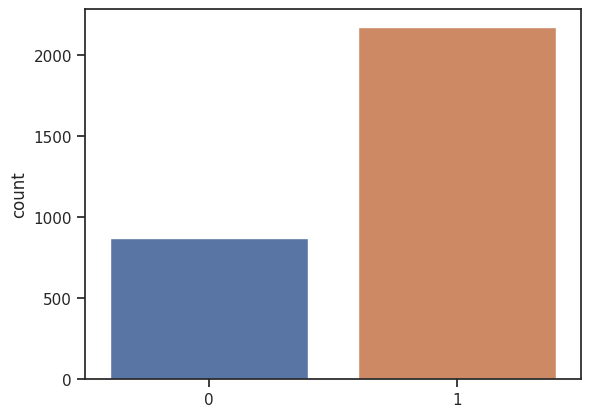

In [13]:
k = 2
km = cluster.KMeans(n_clusters=k, init='random', random_state = 99)
km.fit(X2)
# Hasil clusteringnya
C_km2 = km.predict(X2)
p= sns.countplot(x=C_km2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

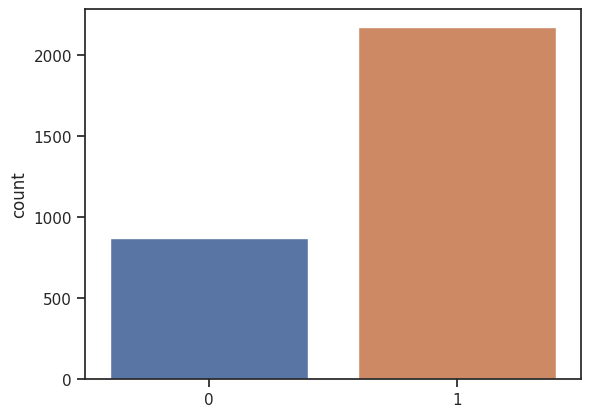

In [14]:
#kmeans++
k = 2
kmPP1 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP1.fit(X2)
C_kmpp2 = kmPP1.predict(X2)

sns.countplot(x=C_kmpp2)
C_kmpp2[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

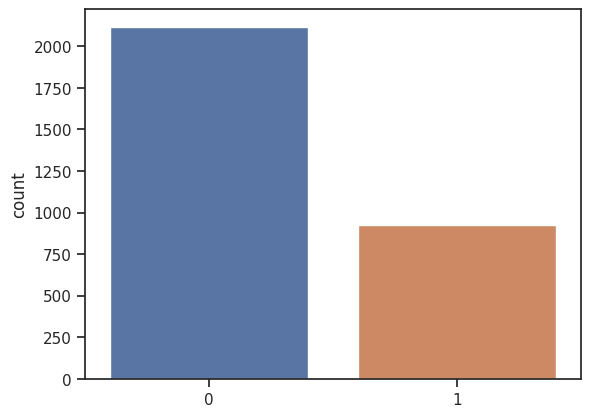

In [15]:
#minibatchkmeans
k = 2
# MiniBatch k-Means http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
mbkm2 = cluster.MiniBatchKMeans(n_clusters=k, init='random', \
                               max_iter=300, tol=0.0001, batch_size = 100, random_state = 99)
mbkm2.fit(X2)
C_mbkm2 = mbkm2.predict(X2)
sns.countplot(x=C_mbkm2)
C_mbkm2[:10]

In [18]:
Hasil_Clustering = [C_km2, C_kmpp2, C_mbkm2]
for res in Hasil_Clustering:
    print(siluet(X2,res), end=', ')

0.47449604001518675, 0.47449604001518675, 0.46744031557933685, 

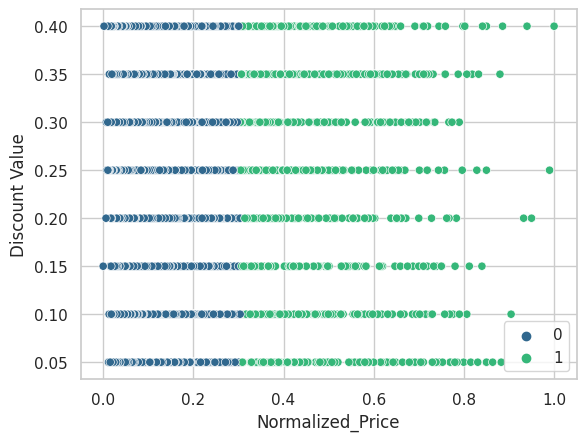

In [19]:
sns.set(style="whitegrid")

# Create a scatter plot for each cluster
sns.scatterplot(data=dfbaru, x='Normalized_Price', y='Discount Value', hue=C_mbkm2, palette='viridis')

# Show the plot
plt.show()

In [20]:
dfbaru['Cluster2'] = C_mbkm2
dfbaru.sample(10)

,Harga Barang,Discount Value,Normalized_Price,Cluster2
453,85020000.0,0.10,0.096233,0
1611,106480000.0,0.25,0.158450,0
2078,133075800.0,0.10,0.235556,0
2716,111936000.0,0.25,0.174268,0
2824,83798400.0,0.35,0.092691,0
2794,89690500.8,0.20,0.109774,0
2851,80990000.0,0.40,0.084549,0
1184,73645000.0,0.10,0.063255,0
2540,170554800.0,0.35,0.344215,1
2266,80040000.0,0.30,0.081795,0


In [23]:
X2 = dfbaru[["Harga Barang", "Discount Value"]]
y2 = dfbaru[["Cluster2"]]
print ('The shape of X is: ' + str(X2.shape))
print ('The shape of y is: ' + str(y2.shape))

The shape of X is: (3045, 2)
The shape of y is: (3045, 1)


In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.33, random_state=1)
print("X_train.shape", X_train2.shape, "y_train.shape", y_train2.shape)
print("X_test.shape", X_test2.shape, "y_test.shape", y_test2.shape)

X_train.shape (2040, 2) y_train.shape (2040, 1)
X_test.shape (1005, 2) y_test.shape (1005, 1)


In [31]:
model2 = Sequential([
        tf.keras.Input(shape=(2,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(2, activation = 'softmax'),
    ], name="Tanyamama_model")
model2.compile(
    loss=SparseCategoricalCrossentropy(from_logits = True),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'])

In [30]:
history2 = model2.fit(
    X_train2, y_train2,batch_size=32,
    epochs=20)

Epoch 1/20
64/64 [==============================] - 5s 9ms/step - loss: 846890.9062 - accuracy: 0.5069
Epoch 2/20
64/64 [==============================] - 0s 6ms/step - loss: 329463.6091 - accuracy: 0.5304
Epoch 3/20
64/64 [==============================] - 0s 6ms/step - loss: 175987.6689 - accuracy: 0.5137
Epoch 4/20
64/64 [==============================] - 1s 8ms/step - loss: 0.6361 - accuracy: 0.6922
Epoch 5/20
64/64 [==============================] - 0s 7ms/step - loss: 0.6233 - accuracy: 0.6922
Epoch 6/20
64/64 [==============================] - 0s 5ms/step - loss: 0.6187 - accuracy: 0.6922
Epoch 7/20
64/64 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.6922
Epoch 8/20
64/64 [==============================] - 0s 7ms/step - loss: 0.6175 - accuracy: 0.6922
Epoch 9/20
64/64 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.6922
Epoch 10/20
64/64 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.6922
Epoc

In [32]:
history3 = model2.fit(
    X_train2, y_train2,batch_size=32,
    epochs=20)

Epoch 1/20
64/64 [==============================] - 1s 2ms/step - loss: 678678.6321 - accuracy: 0.4971
Epoch 2/20
64/64 [==============================] - 0s 2ms/step - loss: 78828.1901 - accuracy: 0.5000
Epoch 3/20
64/64 [==============================] - 0s 2ms/step - loss: 25141.3936 - accuracy: 0.5127
Epoch 4/20
64/64 [==============================] - 0s 2ms/step - loss: 13313.0331 - accuracy: 0.4931
Epoch 5/20
64/64 [==============================] - 0s 2ms/step - loss: 7942.1410 - accuracy: 0.5118
Epoch 6/20
64/64 [==============================] - 0s 2ms/step - loss: 1236.6259 - accuracy: 0.5049
Epoch 7/20
64/64 [==============================] - 0s 2ms/step - loss: 28.3450 - accuracy: 0.6029
Epoch 8/20
64/64 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0.6922
Epoch 9/20
64/64 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.6922
Epoch 10/20
64/64 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.

In [36]:
!mkdir -p saved_model
model2.save('saved_model/my_model')
!zip -r /content/file.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 88%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 88%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 50%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 62%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/fingerprint.pb (stored 0%)


In [104]:
?train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Training loss:", train_loss)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

228/228 [==============================] - 1s 2ms/step - loss: 0.2141 - accuracy: 0.9446
Training loss: 0.214066670891492
Training accuracy: 0.944635252095068
113/113 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9426
Test loss: 0.22005996637754432
Test accuracy: 0.9425543781372002


In [ ]:
model.summary()

Model: "Tanyamama_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10,786
Trainable params: 10,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df3 = df2[df2["Cluster"]==1]
df3.head()

,Harga Barang,Discount Value,Normalized_Price,Cluster
1,345000000,0.05,1.000000,1
3,327600000,0.05,0.949565,1
4,322000000,0.20,0.933333,1
5,321000000,0.15,0.930434,1
7,306800000,0.15,0.889274,1
